## Projeto inspirado no Portal Dados ao Cubo
https://dadosaocubo.com/analisando-dados-do-brasileirao-serie-a/

##### O brasileirão da sérei A é disputado por 20 clubes num sistema de pontos corridos com 2 turnos. O clube que atingir o maior número de pontos ao final será o campeão, assim como os 4 últimos colocados na tabela serão rebaixados para série B. O sistema de pontos corridos começou em 2003 e o número atual de clubes, 20 clubes, foi adotado em 2006

In [1]:
### importando bibliotecas
import pandas as pd
import warnings as wa
import seaborn as sns
import matplotlib.pyplot as plt
 
### ignorando warnings do tipo FutureWarning
wa.simplefilter( action='ignore', category= FutureWarning)
pd.options.mode.chained_assignment = None

### Os dados virão do GitHub, estarão delimitados com ponto e vírgula

In [2]:
### carrega datasets
path_periodo = "https://github.com/juvenalfonseca/python/blob/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-periodo.csv?raw=true"
path_jogos = "https://github.com/juvenalfonseca/python/blob/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-jogos.csv?raw=true"
 
df_periodo = pd.read_csv(path_periodo, delimiter=";")
df_jogos = pd.read_csv(path_jogos, delimiter=";")

In [4]:
df_periodo.head(25)

,Torneio,Inicio,Fim
0,BRA2003,29/03/2003,14/12/2003
1,BRA2004,21/04/2004,19/12/2004
2,BRA2005,11/04/2005,09/12/2005
3,BRA2006,15/04/2006,03/12/2006
4,BRA2007,12/05/2007,02/12/2007
5,BRA2008,09/05/2008,07/12/2008
6,BRA2009,09/05/2009,06/12/2009
7,BRA2010,07/05/2010,05/12/2010
8,BRA2011,20/05/2011,04/12/2011
9,BRA2012,18/05/2012,09/12/2012


In [5]:
df_periodo.count()

Torneio    18
Inicio     18
Fim        18
dtype: int64

In [6]:
type(df_periodo)

pandas.core.frame.DataFrame

In [7]:
df_jogos.head()

,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,29/03/2003,16h00,Sábado,Athlético-PR,Grêmio,Athlético-PR,Arena da Baixada,2,0,PR,RS,PR
1,1,29/03/2003,16h00,Sábado,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ,SP
2,1,30/03/2003,16h00,Domingo,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,-
3,1,30/03/2003,16h00,Domingo,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,-
4,1,30/03/2003,16h00,Domingo,Vitória,Figueirense,-,Barradão,1,1,ES,SC,-


In [8]:
df_jogos.count()

Rodada              7266
Data                7266
Horário             7255
Dia                 7266
Mandante            7266
Visitante           7266
Vencedor            7266
Arena               7266
Mandante Placar     7266
Visitante Placar    7266
Estado Mandante     7266
Estado Visitante    7266
Estado Vencedor     7266
dtype: int64

In [9]:
type(df_jogos)

pandas.core.frame.DataFrame

### Tratamento dos Dados

In [10]:
### padronizando caixa baixa para os nomes das variáveis nas colunas
df_periodo.columns = df_periodo.columns.str.lower()
df_jogos.columns = df_jogos.columns.str.lower()

In [11]:
df_periodo.head()

,torneio,inicio,fim
0,BRA2003,29/03/2003,14/12/2003
1,BRA2004,21/04/2004,19/12/2004
2,BRA2005,11/04/2005,09/12/2005
3,BRA2006,15/04/2006,03/12/2006
4,BRA2007,12/05/2007,02/12/2007


In [12]:
df_jogos.head(3)

,rodada,data,horário,dia,mandante,visitante,vencedor,arena,mandante placar,visitante placar,estado mandante,estado visitante,estado vencedor
0,1,29/03/2003,16h00,Sábado,Athlético-PR,Grêmio,Athlético-PR,Arena da Baixada,2,0,PR,RS,PR
1,1,29/03/2003,16h00,Sábado,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ,SP
2,1,30/03/2003,16h00,Domingo,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,-


In [13]:
### alterando os campos de datas do tipo string para date.
df_periodo['inicio'] = pd.to_datetime(df_periodo['inicio'], format="%d/%m/%Y")
df_periodo['fim'] = pd.to_datetime(df_periodo['fim'], format="%d/%m/%Y")
df_jogos['data'] = pd.to_datetime(df_jogos['data'], format="%d/%m/%Y")

In [14]:
# Com o método title será realizada a padronização dos campos de formato texto
# Dessa forma os textos serão iniciados com letras maiúsculas seguidos por letras minúsculas.
# Será utilizada duas formas de acesso ao método title. 
# A primeira de forma direta através da propriedade str e a segunda utilizando o método apply com lambda.

df_jogos['dia'] = df_jogos['dia'].str.title()
df_jogos['mandante'] = df_jogos['mandante'].str.title()
df_jogos['visitante'] = df_jogos['visitante'].str.title()
df_jogos['vencedor'] = df_jogos['vencedor'].str.title()
df_jogos['arena'] = df_jogos['arena'].apply(lambda x: x.title())

In [15]:
df_jogos.head(3)

,rodada,data,horário,dia,mandante,visitante,vencedor,arena,mandante placar,visitante placar,estado mandante,estado visitante,estado vencedor
0,1,2003-03-29,16h00,Sábado,Athlético-Pr,Grêmio,Athlético-Pr,Arena Da Baixada,2,0,PR,RS,PR
1,1,2003-03-29,16h00,Sábado,Guarani,Vasco,Guarani,Brinco De Ouro,4,2,SP,RJ,SP
2,1,2003-03-30,16h00,Domingo,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,-


###### Para a junção dos dataframes foi definido, para cada um, um novo atributo com o nome key. Como os dataframes df_periodo e df_jogos não têm atributos em comum, o atributo key será utilizado como chave para a junção de ambos os dataframes.

###### Ao definir o atributo key com valor 1 (um) para todos os registros será realizada a junção full join para que todos os registros de ambos os dataframes sejam relacionados. Com isso, será aplicado filtro para considerar apenas os registros que a data de realização do jogo esteja entre a data de início e fim da realização do torneio.

###### merge: método utilizado para a junção entre os dataframes;
###### on: indica o campo que será utilizado na junção;
###### drop: remove a coluna do dataframe;
###### query: filtra os registros conforme o critério especificado.

In [16]:
### juntando os datasets e retornando apenas os registros corretos, criados na junção
df_periodo['key'] = 1
df_jogos['key'] = 1
 
df = pd.merge(df_periodo, df_jogos, on ='key').drop("key", 1)
df = df.query('data >= inicio & data <= fim')

In [17]:
df_periodo.head(5)

,torneio,inicio,fim,key
0,BRA2003,2003-03-29,2003-12-14,1
1,BRA2004,2004-04-21,2004-12-19,1
2,BRA2005,2005-04-11,2005-12-09,1
3,BRA2006,2006-04-15,2006-12-03,1
4,BRA2007,2007-05-12,2007-12-02,1


In [18]:
df_jogos.head(5)

,rodada,data,horário,dia,mandante,visitante,vencedor,arena,mandante placar,visitante placar,estado mandante,estado visitante,estado vencedor,key
0,1,2003-03-29,16h00,Sábado,Athlético-Pr,Grêmio,Athlético-Pr,Arena Da Baixada,2,0,PR,RS,PR,1
1,1,2003-03-29,16h00,Sábado,Guarani,Vasco,Guarani,Brinco De Ouro,4,2,SP,RJ,SP,1
2,1,2003-03-30,16h00,Domingo,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,-,1
3,1,2003-03-30,16h00,Domingo,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,-,1
4,1,2003-03-30,16h00,Domingo,Vitória,Figueirense,-,Barradão,1,1,ES,SC,-,1


In [19]:
# DataFrame resultante da união dos dataFrames df_periodo e df_jogos
df.head(5)

,torneio,inicio,fim,rodada,data,horário,dia,mandante,visitante,vencedor,arena,mandante placar,visitante placar,estado mandante,estado visitante,estado vencedor
0,BRA2003,2003-03-29,2003-12-14,1,2003-03-29,16h00,Sábado,Athlético-Pr,Grêmio,Athlético-Pr,Arena Da Baixada,2,0,PR,RS,PR
1,BRA2003,2003-03-29,2003-12-14,1,2003-03-29,16h00,Sábado,Guarani,Vasco,Guarani,Brinco De Ouro,4,2,SP,RJ,SP
2,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,-
3,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,-
4,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Vitória,Figueirense,-,Barradão,1,1,ES,SC,-


In [20]:
qtd_rodadas = df.groupby('torneio')['rodada'].sum().sort_values(ascending=False).reset_index()
qtd_rodadas.head(10)

,torneio,rodada
0,BRA2003,12973
1,BRA2004,12972
2,BRA2005,9933
3,BRA2007,7416
4,BRA2019,7410
5,BRA2006,7410
6,BRA2009,7410
7,BRA2010,7410
8,BRA2020,7410
9,BRA2012,7410


- Em 2003 e 2004 foram realizadas 46 rodadas, com 24 clubes.
- No ano de 2005 foram realizadas 42 rodadas, com 22 clubes.
- A partir de 2006 o campeonato tomou a formato atual, com 38 rodadas contendo 20 clubes.

### Analisando os Gols

- Agrupando por torneio
- sum no formato lambda com o método de agrupamento agg, somará os valores encontrados na propriedade mandante placar
- O método reset_index desagrupará o conjunto de dados realizada pelo método groupby
- O método rename fará a propriedade mandante placar ser renomeada para gols mandantes
- O atributo inplace=True indica que a operação deve ser efetivada no conjunto de dados
- O mesmo é realizado para determinar os gols dos visitantes e assim chegar ao número total de gols e o percentual de gols dos mandantes e visitantes

In [21]:
# gols por edição
gols_mandante = df[['torneio', 'mandante placar']].groupby('torneio').agg(lambda x: sum(x)).reset_index()
gols_mandante.rename(columns = {"mandante placar": "gols_mandante"}, inplace=True)
 
gols_visitante = df.groupby('torneio')['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)
 
gols_edicao = pd.merge(gols_mandante, gols_visitante, on="torneio")
gols_edicao['gols_total'] = gols_edicao['gols_mandante'] + gols_edicao['gols_visitante']
gols_edicao['gols_mandante_%'] = gols_edicao['gols_mandante' ]/gols_edicao['gols_total']*100
gols_edicao['gols_visitantes_%'] = (gols_edicao['gols_visitante']/gols_edicao['gols_total'])*100
 
gols_edicao

,torneio,gols_mandante,gols_visitante,gols_total,gols_mandante_%,gols_visitantes_%
0,BRA2003,982,610,1592,61.683417,38.316583
1,BRA2004,947,587,1534,61.734029,38.265971
2,BRA2005,835,616,1451,57.546520,42.453480
3,BRA2006,604,426,1030,58.640777,41.359223
4,BRA2007,638,414,1052,60.646388,39.353612
5,BRA2008,654,376,1030,63.495146,36.504854
6,BRA2009,659,435,1094,60.237660,39.762340
7,BRA2010,581,397,978,59.406953,40.593047
8,BRA2011,610,407,1017,59.980334,40.019666
9,BRA2012,559,380,939,59.531416,40.468584


- Podemos observar o comparativo de gols a cada ano do campeonato brasileiro.
- Os clubes mandantes obtiveram o percentual médio de 60% do total de gols.
- A quantidade de gols dos mandantes vem diminuindo ao longo dos anos, influnciando negativamente na artilharia de gols totais.
- Cabe frizar que 2003, 2004 e 2005 houveram mais rodadas

### Análise por Ataque e Defesa

- Plotagem em gráfico de barras dos gols dos mandantes, visitantes e total por edição do torneio. 
- O método concat realizará a junção dos três dataframes que indicam os gols nas modalidades mandante, visitante e total. Os dataframes serão concatenados como se utilizasse um union para formar um novo dataframe.

In [22]:
### gols por edição comparativo
df1 = gols_edicao[['torneio','gols_mandante' ]]
df2 = gols_edicao[['torneio','gols_visitante']]
df3 = gols_edicao[['torneio','gols_total']]
 
df1.rename(columns = {'gols_mandante' : 'gols' }, inplace=True)
df2.rename(columns = {'gols_visitante' : 'gols' }, inplace=True)
df3.rename(columns = {'gols_total' : 'gols' }, inplace=True)
 
df1['tipo_gols'] = 'gols_mandante'
df2['tipo_gols'] = 'gols_visitante'
df3['tipo_gols'] = 'gols_total'
 
df4 = pd.concat([df1, df2, df3]).reset_index(drop=True)

- O dataframe (df4) será utilizado com o método barplot da biblioteca seaborn. Nesse método indica-se as propriedades para os eixos X e Y do gráfico, além da fonte dos dados com a propriedade data. 
- A propriedade hue cria uma legenda para distinguir os valores do gráfico.
- Para definir o título do gráfico é utilizado o método title da biblioteca pyplot. 
- Como o seaborn é desenvolvido sobre a biblioteca matplotlib, a relação é feita de forma transparente no gráfico

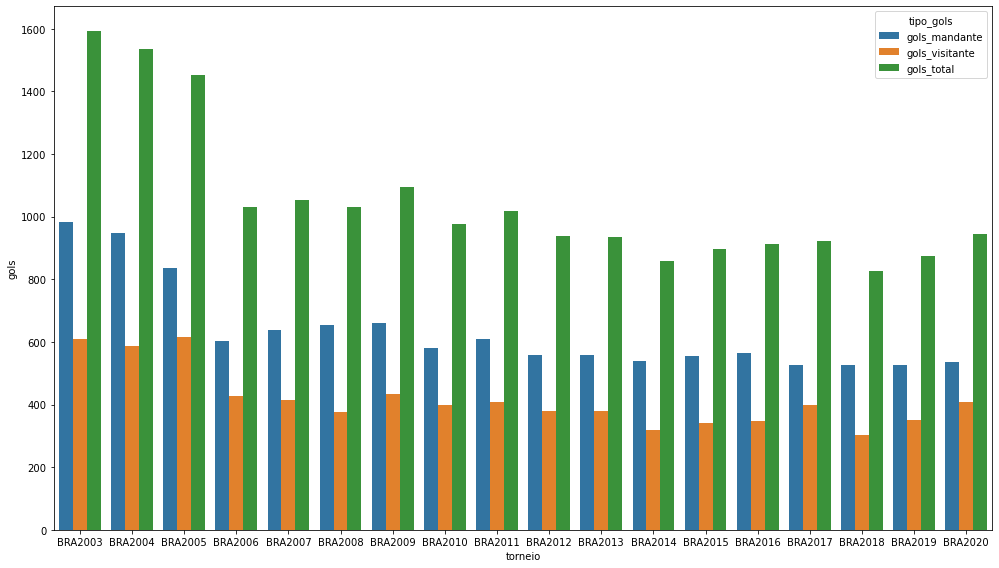

In [23]:
### gráfico gols por edição comparativo
plt.figure(figsize=(14, 8)) 
sns.barplot(x="torneio", y="gols", hue="tipo_gols", data=df4)
plt.tight_layout();
plt.show()

Os 3 primeiros anos tiveram 46, 46 e 42 rodadas, respectivamente. A partir de 2006 foi padronizado em 38 rodadas. Portanto, o número maior de rodadas no ínicio da análise causa maior número de gols.

### Quais os times que têm o ataque mais efetivo e que marca mais gols. Nessa análise será mostrado o top 10 dos clubes com melhores ataques de todas as edições.

In [24]:
### top 10 clubes gols marcados
gols_mandante_time  = df.groupby('mandante')['mandante placar'].sum().sort_values(ascending=False).reset_index()
gols_mandante_time.rename(columns  = {"mandante" : "time", 'mandante placar' : 'gols marcados' }, inplace=True)
 
gols_visitante_time = df.groupby('visitante')['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante_time.rename(columns = {"visitante": "time", 'visitante placar': 'gols marcados' }, inplace=True)
 
gols_time = pd.concat([gols_mandante_time, gols_visitante_time])
 
gols_marcados_time = gols_time.groupby('time')['gols marcados'].sum().sort_values(ascending=False).reset_index()
gols_marcados_time.head(10)

,time,gols marcados
0,Santos,1060
1,São Paulo,1037
2,Flamengo,984
3,Cruzeiro,978
4,Atlético-Mg,967
5,Fluminense,946
6,Grêmio,912
7,Internacional,893
8,Athlético-Pr,892
9,Palmeiras,889


- Times com maior artilharia somando todas as edições do campeonato brasileiro. Neste cenário, destaca-se o Santos com 1.060 gols marcados.

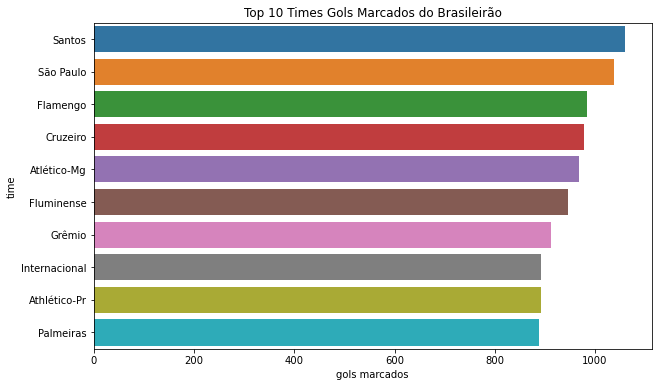

In [25]:
### Apresentando gráfico top 10 clubes gols marcados
plt.figure(figsize=(10, 6)) 
sns.barplot(x="gols marcados", y="time", data=gols_marcados_time.head(10))
plt.title('Top 10 Times Gols Marcados do Brasileirão')
plt.show()

### Melhores e piores ataques por edição

In [26]:
### melhores ataques por edição
df['clube'] = df['mandante']
gols_clubes_mandantes = df.groupby(['torneio','clube'])['mandante placar'].sum().sort_values(ascending=False).reset_index()
gols_clubes_mandantes.rename(columns = {"mandante placar" : "gols_mandante" }, inplace=True)
 
df['clube'] = df['visitante']
gols_clubes_visitantes = df.groupby(['torneio','clube'])['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_clubes_visitantes.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)
 
gols_clubes = pd.merge(gols_clubes_mandantes, gols_clubes_visitantes,  on=["torneio","clube"])
gols_clubes['gols_total'] = gols_clubes['gols_mandante'] + gols_clubes['gols_visitante']
 
ataque_pior = gols_clubes.groupby('torneio')['gols_total'].min().sort_values(ascending=False).reset_index()
ataque_melhor = gols_clubes.groupby('torneio')['gols_total'].max().sort_values(ascending=False).reset_index()
 
gols_torneio_ataque_melhor = pd.merge(gols_clubes, ataque_melhor, on=['torneio','gols_total'])[['torneio','clube','gols_total']]
gols_torneio_ataque_melhor.rename(columns = {"gols_total": "ataque_melhor"}, inplace=True)
 
gols_torneio_ataque_pior = pd.merge(gols_clubes, ataque_pior, on=['torneio','gols_total'])[['torneio','clube','gols_total']]
gols_torneio_ataque_pior.rename(columns   = {"gols_total": "ataque_pior"}, inplace=True)
 
gols_ataques = pd.merge(gols_torneio_ataque_melhor, gols_torneio_ataque_pior, on="torneio", suffixes=("_melhor","_pior"))
gols_ataques.sort_values(['torneio','clube_melhor'])

,torneio,clube_melhor,ataque_melhor,clube_pior,ataque_pior
2,BRA2003,Cruzeiro,102,Vitória,50
0,BRA2004,Santos,103,Ponte Preta,43
1,BRA2004,Santos,103,Guarani,43
5,BRA2005,Corinthians,87,Brasiliense,49
16,BRA2006,São Paulo,66,São Caetano,37
7,BRA2007,Cruzeiro,74,América-Rn,24
13,BRA2008,Flamengo,67,Ipatinga,37
4,BRA2009,Grêmio,67,Athlético-Pr,42
15,BRA2010,Grêmio,68,Guarani,33
17,BRA2011,Fluminense,60,Athlético-Pr,38


- O Cruzeiro teve o melhor ataquem em 4 oportunidades (2003, 2007, 2013, 2014)


### Análise de Pontuação

- Clubes com melhor e pior pontuação de todas as edições.

- O método nunique faz a contagem dos registros desconsiderando os valores duplicados.

In [27]:
# pontuação
pontos_participantes = df.groupby('torneio')['mandante'].nunique().sort_values(ascending=False).reset_index()
pontos_participantes['pontos_max'] = (pontos_participantes.mandante - 1)*2*3
 
pontos = df[['torneio', 'mandante', 'visitante', 'mandante placar', 'visitante placar']]
pontos['pontos_mandante' ] = pontos.apply(lambda x: 3 if x['mandante placar'] > x['visitante placar'] else (0 if x['mandante placar'] < x['visitante placar'] else 1), axis=1)
pontos['pontos_visitante'] = pontos.apply(lambda x: 3 if x['mandante placar'] < x['visitante placar'] else (0 if x['mandante placar'] > x['visitante placar'] else 1), axis=1)
 
pontos_mandantes = pontos.groupby(['torneio','mandante' ])['pontos_mandante' ].sum().sort_values(ascending=False).reset_index()
pontos_mandantes.rename(columns = {"mandante": "clube" }, inplace=True)

pontos_visitante = pontos.groupby(['torneio','visitante'])['pontos_visitante'].sum().sort_values(ascending=False).reset_index()
pontos_visitante.rename(columns = {"visitante": "clube"}, inplace=True)

pontos_total = pd.merge(pontos_mandantes, pontos_visitante, on=['torneio','clube'])
pontos_total['pontos_total'] = pontos_total.pontos_mandante + pontos_total.pontos_visitante

In [28]:
# Maior pontuador foi o Cruzeiro em 2003 com 100 pontos em 46 rodadas.  
# Obs: Haviam mais do que 20 clubes, com isso, mais rodadas para marcar pontos

pontos_total[pontos_total['pontos_total'] == pontos_total['pontos_total'].max()]

,torneio,clube,pontos_mandante,pontos_visitante,pontos_total
2,BRA2003,Cruzeiro,56,44,100


In [29]:
# Menor pontuador fio o América do Rio Grande do Norte no ano de 2007

pontos_total[pontos_total['pontos_total'] == pontos_total['pontos_total'].min()]

,torneio,clube,pontos_mandante,pontos_visitante,pontos_total
369,BRA2007,América-Rn,9,8,17


### Análise de Resultados

Na análise de resultados é identificado o número de vitórias, empates e derrotas dos clubes que participaram de ao menos uma edição do campeonato de pontos corridos do Brasileirão.

Para definir vitória, derrota ou empate foram utilizado os seguintes critérios:
- Se obteve três pontos, considera-se uma vitória;
- Caso conquistou um ponto, considera-se um empate;
- Se não ganhou pontos, considera-se uma derrota.

In [30]:
### número de vitórias, empates e derrotas das equipes

resultado = pontos[['torneio','mandante','visitante','pontos_mandante','pontos_visitante']]
resultado['resultado_mandante' ] = pontos.apply(lambda x: 'Vitória' if x['pontos_mandante' ] == 3 else ('Derrota' if x['pontos_mandante' ] == 0 else 'Empate'), axis=1)
resultado['resultado_visitante'] = pontos.apply(lambda x: 'Vitória' if x['pontos_visitante'] == 3 else ('Derrota' if x['pontos_visitante'] == 0 else 'Empate'), axis=1)
 
resultado_mandante = resultado.groupby( ['mandante' ,'resultado_mandante' ])['torneio'].count().reset_index()
resultado_mandante.rename(columns  = {"mandante": "clube" , "resultado_mandante" :"resultado", "torneio":"ocorrencia"}, inplace=True)
 
resultado_visitante = resultado.groupby(['visitante','resultado_visitante'])['torneio'].count().reset_index()
resultado_visitante.rename(columns = {"visitante": "clube", "resultado_visitante":"resultado", "torneio":"ocorrencia"}, inplace=True)
 
resultado = pd.concat([resultado_mandante, resultado_visitante])
resultado = resultado.groupby(['clube','resultado'])['ocorrencia'].sum().reset_index()

In [31]:
resultado.head(30)

,clube,resultado,ocorrencia
0,América-Mg,Derrota,59
1,América-Mg,Empate,30
2,América-Mg,Vitória,25
3,América-Rn,Derrota,29
4,América-Rn,Empate,5
5,América-Rn,Vitória,4
6,Athlético-Pr,Derrota,243
7,Athlético-Pr,Empate,157
8,Athlético-Pr,Vitória,266
9,Atlético-Go,Derrota,86


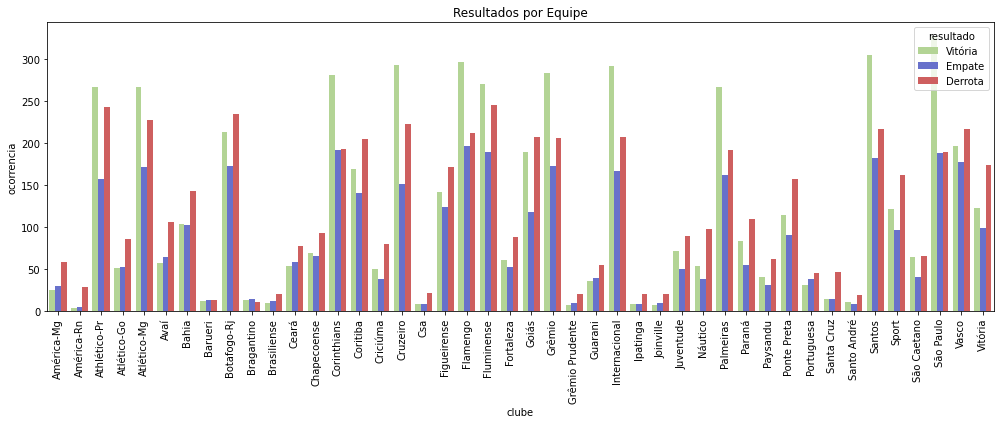

In [32]:
### gráfico de vitórias, empates e derrotas das equipes

colors = ["#b2df8a", "#5764db","#e14c4c"]
plt.figure(figsize=(14, 6)) 
sns.set_palette(sns.color_palette(colors))
g = sns.barplot(x="clube", y="ocorrencia", hue="resultado", data=resultado, hue_order=['Vitória','Empate','Derrota'])
plt.title('Resultados por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()

- A análise por números de vitórias, empates e derrotas destaca principalmente os clubes com maiores participações no torneio.

#### Analisando o aproveitamento de cada clube em suas participações.

#### Realizado o cálculo do percentual de vitórias, derrotas e empates para cada clube.

In [33]:
### percentual de resultados por equipe
vit = resultado.query("resultado == 'Vitória'")
emp = resultado.query("resultado == 'Empate'" )
der = resultado.query("resultado == 'Derrota'")
 
vit.rename(columns = {"ocorrencia": "vitorias"}, inplace=True)
emp.rename(columns = {"ocorrencia": "empates" }, inplace=True)
der.rename(columns = {"ocorrencia": "derrotas"}, inplace=True)
 
vit = vit[['clube','vitorias']]
emp = emp[['clube','empates']]
der = der[['clube','derrotas']]
 
rm = pd.merge(vit, emp, on='clube')
ca = pd.merge(rm , der, on='clube')
ca['total'] = ca['vitorias'] + ca['empates'] + ca['derrotas']
 
ca['perc_vitorias'] = (ca.vitorias / ca.total)*100
ca['perc_empates' ] = (ca.empates  / ca.total)*100
ca['perc_derrotas'] = (ca.derrotas / ca.total)*100
 
ca.head()

,clube,vitorias,empates,derrotas,total,perc_vitorias,perc_empates,perc_derrotas
0,América-Mg,25,30,59,114,21.929825,26.315789,51.754386
1,América-Rn,4,5,29,38,10.526316,13.157895,76.315789
2,Athlético-Pr,266,157,243,666,39.939940,23.573574,36.486486
3,Atlético-Go,51,53,86,190,26.842105,27.894737,45.263158
4,Atlético-Mg,267,172,227,666,40.090090,25.825826,34.084084


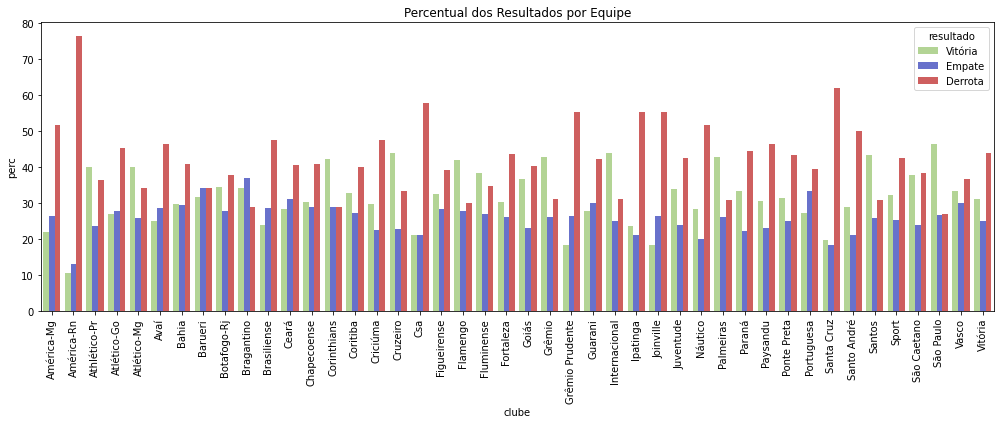

In [35]:
### gráfico com percentual de resultados em ordem alfabética por equipe

percentual = resultado
perc_total = percentual.groupby(['clube'])['ocorrencia'].sum().reset_index()
percentual = pd.merge(percentual, perc_total, on='clube', suffixes=("","_y") )
 
percentual.rename(columns = {"ocorrencia_y": "perc"}, inplace=True)
percentual['perc'] = (percentual.ocorrencia / percentual.perc)*100

plt.figure(figsize=(14, 6))

colors = ["#b2df8a", "#5764db","#e14c4c"]
sns.set_palette(sns.color_palette(colors))
 
g = sns.barplot(x="clube", y="perc", hue="resultado", data=percentual, hue_order=['Vitória','Empate','Derrota'])

plt.title('Percentual dos Resultados por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()

- Um fato curioso é que dos 44 times que disputaram o campeonato nesses anos, 30 deles tem mais derrotas do que vitórias em seu currículo. Assim, pode-se dizer que apenas 31,8% dos clubes são mais vitoriosos do que perdedores.

### Análise dos Campeões

- Verificando os clubes que mais pontuaram em cada ano do campeonato brasileiro
- Realizado merge do dataframe dos campeões com o dataframe de pontos totais 
- Calculado o aproveitamento de cada campeão por torneio, extraindo o ano do torneio pelo próprio código do torneio. Nesse caso, é utilizado o método extract usando uma expressão regular para retornar apenas números da descrição e depois convertê-los em inteiro com o método astype.

In [39]:
### campeões
campeoes = pontos_total.groupby('torneio')['pontos_total'].max().reset_index()
campeoes.rename(columns = {"pontos_total": "maior_ponto"}, inplace=True)
campeoes = pd.merge(campeoes, pontos_total, left_on=['torneio','maior_ponto'], right_on=['torneio','pontos_total'])
campeoes = pd.merge(campeoes, pontos_participantes, on='torneio')
campeoes['aproveitamento'] = (campeoes.pontos_total / campeoes.pontos_max)*100
campeoes['ano'] = campeoes['torneio'].str.extract('(\d+)').astype(int)
campeoes

,torneio,maior_ponto,clube,pontos_mandante,pontos_visitante,pontos_total,mandante,pontos_max,aproveitamento,ano
0,BRA2003,100,Cruzeiro,56,44,100,24,138,72.463768,2003
1,BRA2004,89,Santos,56,33,89,24,138,64.492754,2004
2,BRA2005,81,Corinthians,42,39,81,22,126,64.285714,2005
3,BRA2006,78,São Paulo,46,32,78,20,114,68.421053,2006
4,BRA2007,77,São Paulo,42,35,77,20,114,67.543860,2007
5,BRA2008,75,São Paulo,46,29,75,20,114,65.789474,2008
6,BRA2009,67,Flamengo,40,27,67,20,114,58.771930,2009
7,BRA2010,71,Fluminense,41,30,71,20,114,62.280702,2010
8,BRA2011,71,Corinthians,41,30,71,20,114,62.280702,2011
9,BRA2012,77,Fluminense,38,39,77,20,114,67.543860,2012


Com o dataframe de campeões podemos determinar os campeões com as melhores e piores pontuações. Aqui utilizamos o if else para determinar um atributo de observação quanto a maior e menor pontuação do campeão. Com o if else se a primeira condição for verdadeira (if) será definido o valor para essa condição, caso contrário será definido o valor da condição do else. 

In [40]:
### campeões com a maior e menor pontuação
campeoes_pontuacao = campeoes[['torneio', 'clube', 'pontos_total', 'aproveitamento']]
campeoes_pontuacao['maior_ponto'] = campeoes_pontuacao.pontos_total.max()
campeoes_pontuacao['menor_ponto'] = campeoes_pontuacao['pontos_total'].min()
campeoes_pontuacao = campeoes_pontuacao.query('pontos_total == maior_ponto or pontos_total == menor_ponto')
campeoes_pontuacao['observacao'] = campeoes_pontuacao.apply(lambda x: 'Campeão com a maior pontuação' if x['pontos_total'] == x['maior_ponto'] else 'Campeão com a menor pontuação', axis=1)
campeoes_pontuacao = campeoes_pontuacao[['torneio', 'clube', 'pontos_total', 'observacao']]
campeoes_pontuacao

,torneio,clube,pontos_total,observacao
0,BRA2003,Cruzeiro,100,Campeão com a maior pontuação
6,BRA2009,Flamengo,67,Campeão com a menor pontuação


Também com os melhores e piores aproveitamentos.

In [41]:
### campeões com o maior e menor aproveitamento
campeoes_aproveitamento = campeoes[['torneio', 'clube', 'pontos_total', 'aproveitamento']]
campeoes_aproveitamento['maior_aproveitamento'] = campeoes_aproveitamento.aproveitamento.max()
campeoes_aproveitamento['menor_aproveitamento'] = campeoes_aproveitamento['aproveitamento'].min()
campeoes_aproveitamento = campeoes_aproveitamento.query('aproveitamento == maior_aproveitamento or aproveitamento == menor_aproveitamento')
campeoes_aproveitamento['observacao'] = campeoes_aproveitamento.apply(lambda x: 'Campeão com o maior aproveitamento' if x['aproveitamento'] == x['maior_aproveitamento'] else 'Campeão com o menor aproveitamento', axis=1)
campeoes_aproveitamento = campeoes_aproveitamento[['torneio', 'clube', 'aproveitamento', 'observacao']]
campeoes_aproveitamento

,torneio,clube,aproveitamento,observacao
6,BRA2009,Flamengo,58.771930,Campeão com o menor aproveitamento
16,BRA2019,Flamengo,78.947368,Campeão com o maior aproveitamento


- O Flamento obteve títulos em 2009 e 2019. Na conquista de 2019 o Flamengo obteve 78,95%, com maior aproveitamento entre os campeões. E, também obteve conquista de título com menor aproveitamento, apenas 58,77% em 2009. Os títulos foram conquistados com 38 rodadas contém jogos de ida e volta.

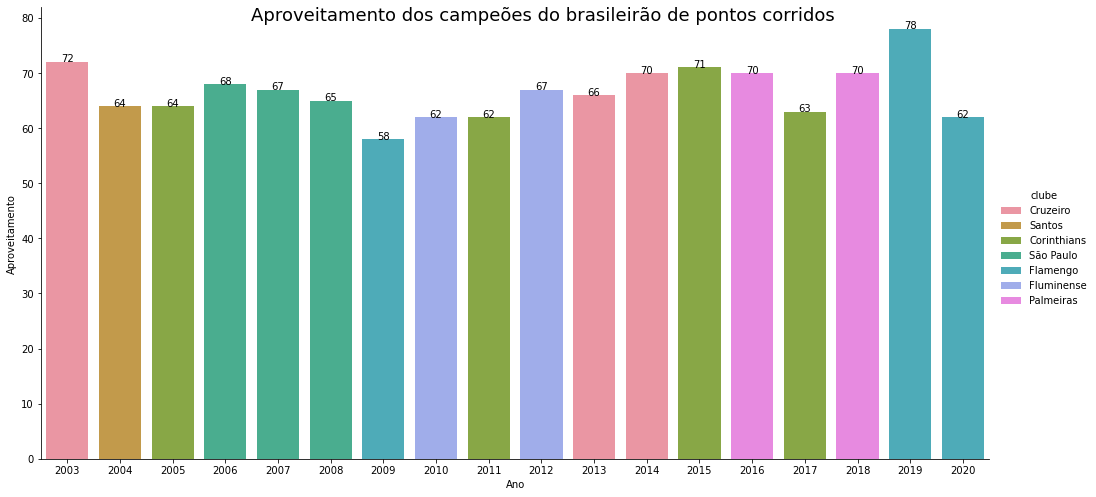

In [42]:
### gráfico de campeões por aproveitamento
campeoes['aprov'] = campeoes.aproveitamento.astype(int)
 
g = sns.catplot(x='ano',y='aprov', data=campeoes, hue='clube', dodge=False, kind='bar', height=7, aspect=2)
g.set_axis_labels('Ano','Aproveitamento')
g.fig.suptitle('Aproveitamento dos campeões do brasileirão de pontos corridos', ha='center', fontsize=18)
 
for index, row in campeoes.iterrows():
   g.ax.text(row.name, row.aprov, row.aprov, color='black', ha="center")

O aproveitamento dos campeões é bem equilibrado, apenas nos anos de 2009 e 2019.